# 1) Data Manipulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
dataset = pd.read_csv('Data.csv')

In [3]:
dataset.describe

<bound method NDFrame.describe of      Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]>

In [4]:
dataset.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [5]:
dataset['Calories'].mean()

375.79024390243916

In [6]:
new_calories = np.where(dataset['Calories'].isnull(),375.79,dataset['Calories'])


In [7]:
dataset['Calories']= new_calories


In [8]:
dataset.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [9]:
selected_columns = ['Duration', 'Pulse', 'Maxpulse']
aggregated_data = dataset[selected_columns].agg({
    'Duration': ['min', 'max', 'count', 'mean'],
    'Pulse': ['min', 'max', 'count', 'mean'], 'Maxpulse': ['min', 'max', 'count', 'mean']
})

print(aggregated_data)


         Duration       Pulse    Maxpulse
min     15.000000   80.000000  100.000000
max    300.000000  159.000000  184.000000
count  169.000000  169.000000  169.000000
mean    63.846154  107.461538  134.047337


In [10]:
dataset[(dataset['Calories']>500) & (dataset['Calories']<1000)]


,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [11]:
dataset[(dataset['Calories']>500) & (dataset['Pulse']<100)]


,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [12]:
df_modified=dataset.drop("Maxpulse",axis=1)
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [13]:
dataset=dataset.drop("Maxpulse",axis=1)
dataset

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [14]:
dataset["Calories"] = dataset["Calories"].astype(float).astype(int)
dataset

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


<AxesSubplot:xlabel='Duration', ylabel='Calories'>

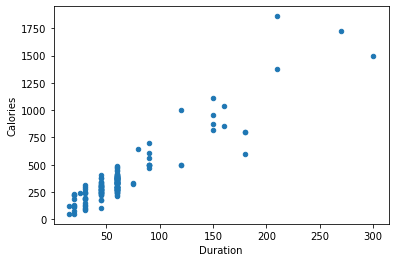

In [15]:
dataset.plot.scatter(x = 'Duration', y = 'Calories')

# 2) Linear Regression

In [16]:
dataset01 = pd.read_csv('Salary_Data.csv')

In [17]:
dataset01

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
from sklearn.model_selection import train_test_split




X = dataset01.drop('Salary', axis=1) 
y = dataset01['Salary'] 

X




,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [19]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [22]:
y_pred

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

In [23]:
Data_frame = pd.DataFrame({"Actual":y_test, "predicted":y_pred})
Data_frame

,Actual,predicted
27,112635.0,115814.307562
15,67938.0,71511.925348
23,113812.0,102617.853286
17,83088.0,75282.340855
8,64445.0,55487.659440
9,57189.0,60200.678825
28,122391.0,122412.534701
24,109431.0,107330.872670
12,56957.0,63028.490456
0,39343.0,35692.978025


In [24]:
from sklearn import metrics
print('Mean Square Error:',metrics.mean_squared_error(y_test,y_pred))


Mean Square Error: 35301898.887134895


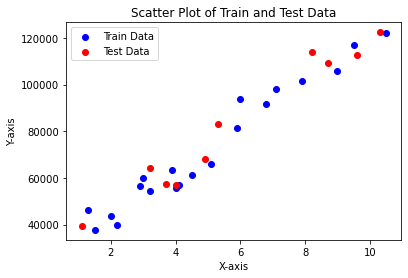

In [25]:



plt.scatter(X_train, y_train, label='Train Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Train and Test Data')


plt.legend()


plt.show()
